In [2]:
import numpy as np
import pandas as pd

#Plotting
import matplotlib.pyplot as plt
import seaborn
import matplotlib.mlab as mlab

#statistical calculation
from scipy.stats import norm

#Tabular output data
from tabulate import tabulate

In [3]:
#Variance-Covariance Approach
df = pd.read_csv(r"C:\Users\manog\Documents\FNB_2.csv")
df = df[['Close']]
df['returns'] = df.Close.pct_change()

C:\Users\manog\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


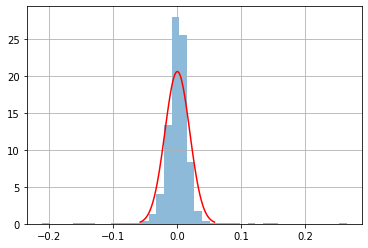

In [4]:
mean  = np.mean(df['returns'])
std_dev = np.std(df['returns'])

df['returns'].hist(bins=40, normed = True, histtype = 'stepfilled', alpha=0.5)
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev,100)
plt.plot(x, norm.pdf(x, mean, std_dev), "r")
plt.show()

In [5]:
VaR_90_1 = norm.ppf(1-0.9, mean, std_dev)
VaR_95_1 = norm.ppf(1-0.95, mean, std_dev)
VaR_99_1 = norm.ppf(1-0.99, mean, std_dev)

print(tabulate([['90%', VaR_90_1],['95%', VaR_95_1], ['99%', VaR_99_1]], headers=['Confidence Level','Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0248865
95%                      -0.0319204
99%                      -0.0451149


In [6]:
#Historical Approach

In [7]:
df = pd.read_csv(r"C:\Users\manog\Documents\FNB_2.csv")

In [8]:
df['returns'] = df.Close.pct_change()

In [9]:
df = df.dropna()

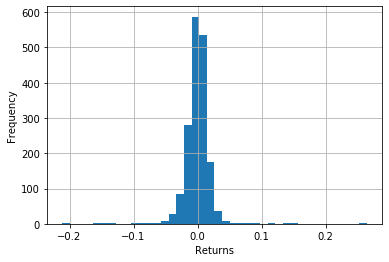

In [10]:
plt.hist(df.returns, bins = 40)
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [11]:
df.sort_values('returns', inplace=True, ascending = True)

In [15]:
Var_90 = df['returns'].quantile(0.1)
Var_95 = df['returns'].quantile(0.05)
Var_99 = df['returns'].quantile(0.01)

In [17]:
print(tabulate([['90%', Var_90],['95%', Var_95], ['99%', Var_99]], headers=['Confidence Level','Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0183492
95%                      -0.0258159
99%                      -0.0454966


In [14]:
#Reference the law of large numbers here!!!!!


In [19]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,returns
1731,2020-03-10,8.62,8.88,8.32,8.88,8.88,3393400,0.086903
1743,2020-03-26,6.87,7.58,6.64,7.51,7.51,4165700,0.117560
1734,2020-03-13,8.15,8.57,7.73,8.57,8.57,2958200,0.133598
1741,2020-03-24,6.19,6.92,6.19,6.78,6.78,2668900,0.153061
1738,2020-03-19,5.50,7.08,5.05,7.08,7.08,4690800,0.264286
